<a href="https://colab.research.google.com/github/gaojing33/Stat-Data-Science/blob/main/multiple%20regression%209%20Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **new version**

# **1. explanatory analysis**

Descriptive Statistics for Each Variable:
       Higher Education Population  Per Capita Income  Tourist Count  \
count                   297.000000         297.000000   2.970000e+02   
mean                     25.281818       15017.757576   3.140716e+07   
std                       7.196739       10575.355093   4.499022e+07   
min                      10.700000        1859.000000   5.540390e+05   
25%                      19.500000        6084.000000   4.274035e+06   
50%                      25.500000       12127.000000   1.311606e+07   
75%                      31.100000       22745.000000   2.970011e+07   
max                      41.000000       47655.000000   1.851210e+08   

       High Value Manufacturing  Per Capita Waste  
count                297.000000        297.000000  
mean               33998.929293        477.282828  
std                37131.563334        129.789516  
min                  507.000000        247.000000  
25%                 7565.000000        387.000000

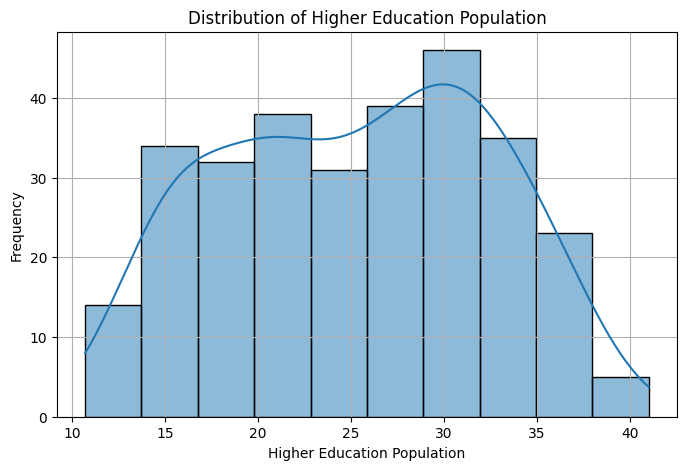

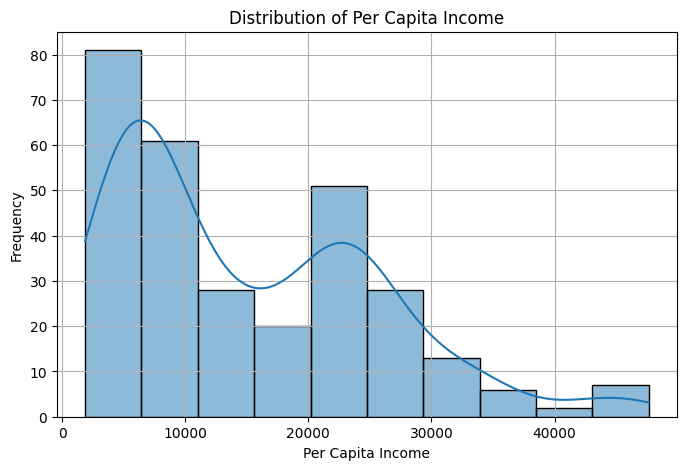

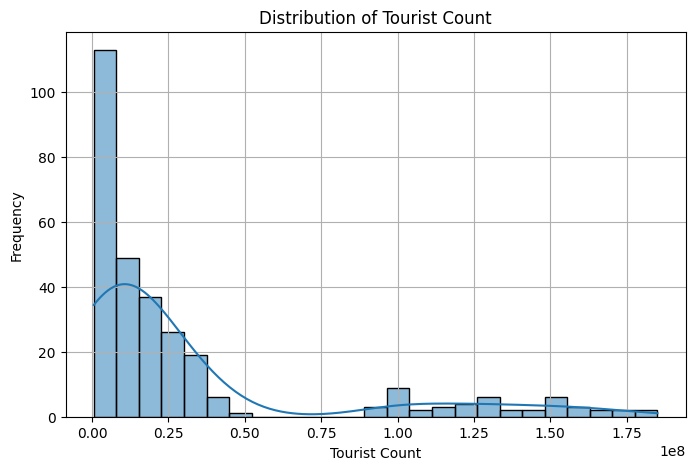

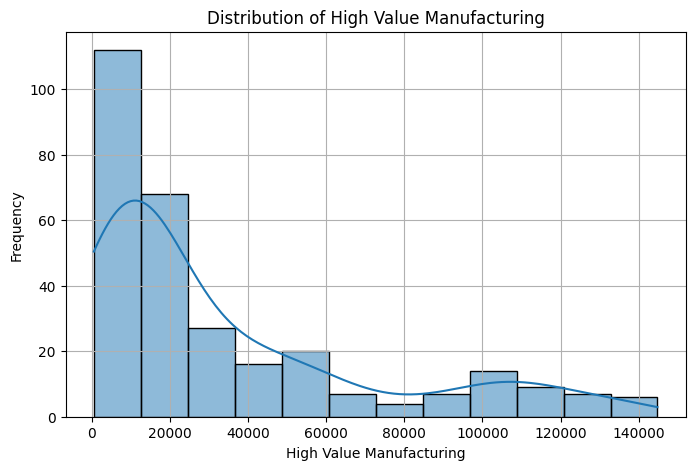

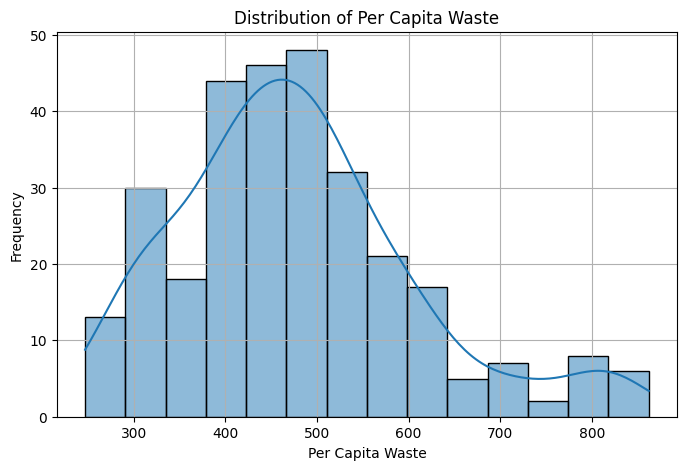

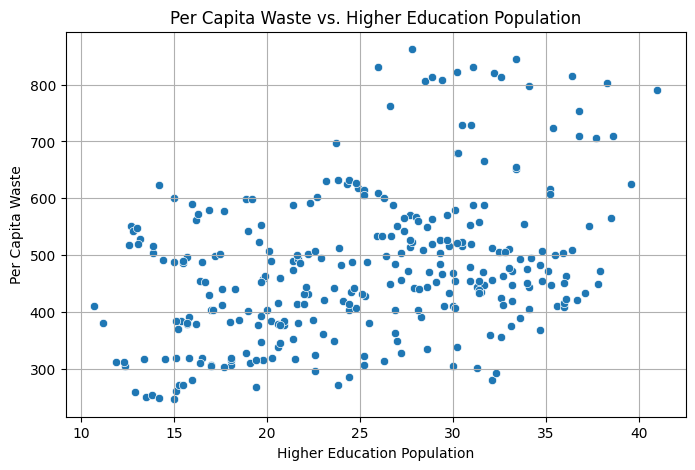

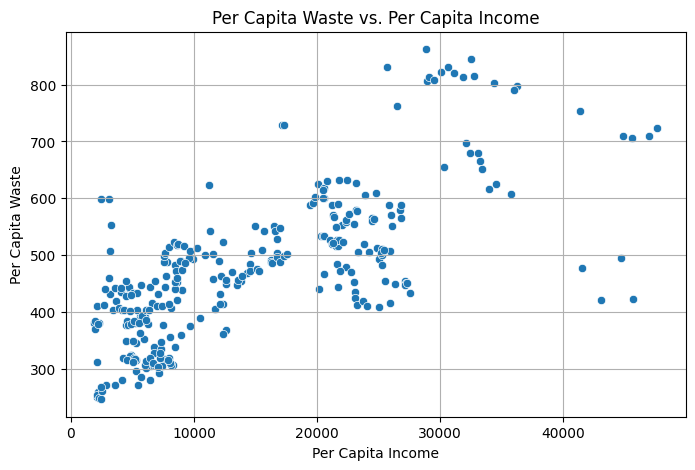

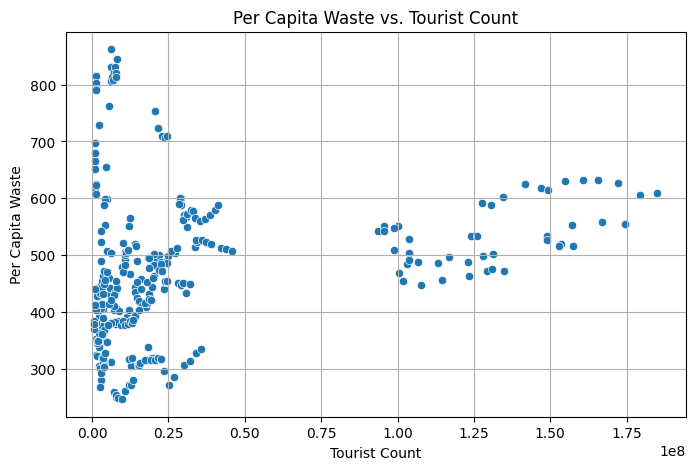

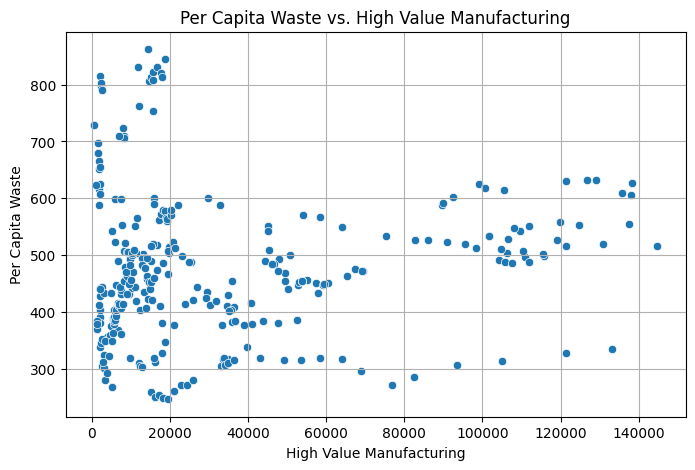

Correlation Matrix:
                             Per Capita Waste
Year                                 0.020026
Higher Education Population          0.386636
Per Capita Waste                     1.000000
Per Capita Income                    0.723302
Tourist Count                        0.221045
High Value Manufacturing             0.068015


In [13]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from the CSV file
file_path = '/content/Final_Combined_Higher_Education_Waste_Income_Tourist_Manufacture_Data (2).csv'
df = pd.read_csv(file_path)

# Step 3: Data cleaning - Drop the 'Low Value Manufacturing' column
df = df.drop(columns=['Low Value Manufacturing'])

# Convert all relevant columns to numeric values, coercing errors to handle non-numeric entries
columns_to_check = ['Higher Education Population', 'Per Capita Income',
                    'Tourist Count', 'High Value Manufacturing', 'Per Capita Waste']

for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing or non-numeric values
df_clean = df.dropna(subset=columns_to_check)

# Step 4: Descriptive Statistics
print("Descriptive Statistics for Each Variable:")
print(df_clean[columns_to_check].describe())

# Step 5: Plotting Histograms for Each Variable
for column in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Step 6: Scatter Plots with the Dependent Variable (Per Capita Waste)
for column in ['Higher Education Population', 'Per Capita Income', 'Tourist Count', 'High Value Manufacturing']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_clean[column], y=df_clean['Per Capita Waste'])
    plt.title(f'Per Capita Waste vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Per Capita Waste')
    plt.grid(True)
    plt.show()

# Step 7: Correlation Analysis
# Ensure we only include numeric columns for the correlation matrix
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix[['Per Capita Waste']])


# **2. multiple regression**

Variance Inflation Factor (VIF) for each feature:
                       Feature        VIF
0                        const  16.270939
1  Higher Education Population   1.686694
2            Per Capita Income   1.755117
3                Tourist Count   3.598714
4     High Value Manufacturing   3.533224
                            OLS Regression Results                            
Dep. Variable:       Per Capita Waste   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     95.19
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.00e-51
Time:                        12:31:33   Log-Likelihood:                -1742.2
No. Observations:                 297   AIC:                             3494.
Df Residuals:                     292   BIC:                             3513.
Df Model:                           4                             

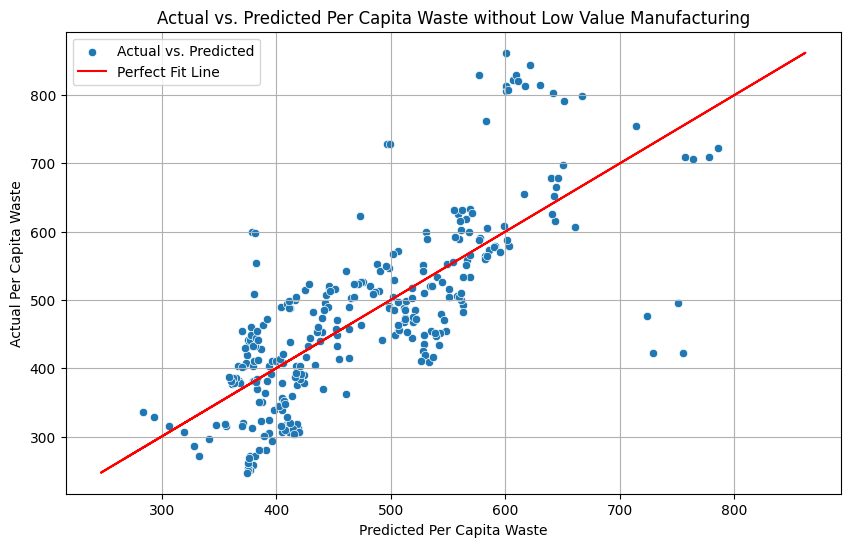

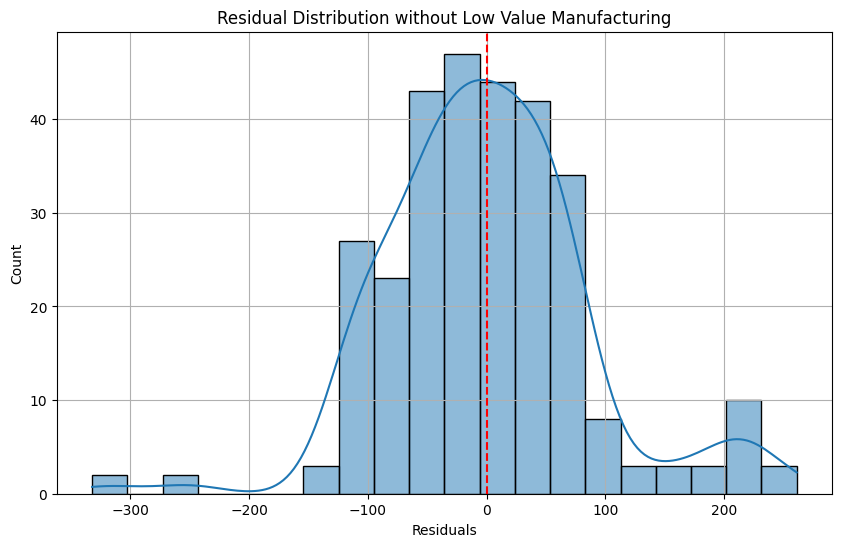

In [11]:
# Step 1: Import required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2: Load the data from the CSV file
file_path = '/content/Final_Combined_Higher_Education_Waste_Income_Tourist_Manufacture_Data (2).csv'
df = pd.read_csv(file_path)

# Step 3: Data cleaning - Drop the 'Low Value Manufacturing' column and ensure all relevant columns are numeric
# We focus on the remaining variables only
df = df.drop(columns=['Low Value Manufacturing'])
columns_to_check = ['Higher Education Population', 'Per Capita Income',
                    'Tourist Count', 'High Value Manufacturing', 'Per Capita Waste']

# Convert all relevant columns to numeric values, coercing errors to handle non-numeric entries
for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing or non-numeric values
df_clean = df.dropna(subset=columns_to_check)

# Step 4: Define the independent variables (X) and dependent variable (Y)
X = df_clean[['Higher Education Population', 'Per Capita Income',
              'Tourist Count', 'High Value Manufacturing']]
Y = df_clean['Per Capita Waste']

# Step 5: Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Step 6: Calculate Variance Inflation Factor (VIF) for each independent variable to check multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Step 7: Fit the multiple linear regression model using statsmodels
model = sm.OLS(Y, X).fit()

# Step 8: Display the regression results summary
print(model.summary())

# Step 9: Visualize the relationship between the predicted values and the actual values of Per Capita Waste
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=Y, label='Actual vs. Predicted')
plt.plot(Y, Y, color='red', label='Perfect Fit Line')  # Reference line for perfect prediction
plt.xlabel('Predicted Per Capita Waste')
plt.ylabel('Actual Per Capita Waste')
plt.title('Actual vs. Predicted Per Capita Waste without Low Value Manufacturing')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Residual analysis - Plot residuals to check the distribution
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residual Distribution without Low Value Manufacturing')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()



<h2>Interpretation of Regression Results</h2>

<h3>1. R-squared and Adjusted R-squared</h3>
<ul>
    <li><strong>R-squared: 0.566</strong> — This indicates that 56.6% of the variability in per capita waste generation is explained by the model. This is a decent explanatory power but leaves around 43.4% unexplained.</li>
    <li><strong>Adjusted R-squared: 0.560</strong> — This value, adjusted for the number of predictors, remains close to R-squared, indicating that the variables meaningfully contribute to the model.</li>
</ul>

<h3>2. Significance of Variables</h3>

<h4>Higher Education Population</h4>
<ul>
    <li><strong>Coefficient:</strong> -2.0128</li>
    <li><strong>Significance:</strong> Statistically significant (p-value = 0.027)</li>
    <li><strong>Interpretation:</strong> Higher education levels reduce per capita waste generation, likely due to increased environmental awareness.</li>
</ul>

<h4>Per Capita Income</h4>
<ul>
    <li><strong>Coefficient:</strong> 0.0094</li>
    <li><strong>Significance:</strong> Highly significant (p-value < 0.0001)</li>
    <li><strong>Interpretation:</strong> Higher income leads to greater consumption and increased waste production.</li>
</ul>

<h4>Tourist Count</h4>
<ul>
    <li><strong>Coefficient:</strong> 1e-06</li>
    <li><strong>Significance:</strong> Statistically significant (p-value < 0.0001)</li>
    <li><strong>Interpretation:</strong> Tourism increases waste due to higher consumption of disposable goods by visitors.</li>
</ul>

<h4>High Value Manufacturing</h4>
<ul>
    <li><strong>Coefficient:</strong> -0.0012</li>
    <li><strong>Significance:</strong> Statistically significant (p-value < 0.0001)</li>
    <li><strong>Interpretation:</strong> High value manufacturing is associated with lower waste generation due to more efficient industrial practices.</li>
</ul>

<h3>3. Model Diagnostics</h3>
<ul>
    <li><strong>F-statistic:</strong> 95.19, highly significant (p < 0.0001) — Indicates that at least one predictor has a significant relationship with waste generation.</li>
    <li><strong>Durbin-Watson:</strong> 0.421 — Suggests strong positive autocorrelation in residuals, indicating potential missing variables or trends.</li>
    <li><strong>Omnibus and Jarque-Bera tests:</strong> Residuals are not normally distributed, suggesting possible model misspecification.</li>
    <li><strong>Condition Number:</strong> 2.21e+08 — Large, indicating potential multicollinearity issues or numerical problems.</li>
</ul>

<h3>4. VIF Analysis</h3>
<ul>
    <li>All variables have <strong>VIF values below 5</strong>, indicating low multicollinearity among the predictors.</li>
</ul>

<h2>Conclusion</h2>
<p><strong>Most Influential Variables:</strong> Per Capita Income, Tourist Count, and High Value Manufacturing are the strongest predictors, while Higher Education Population also plays a role in reducing waste generation.</p>
<p><strong>Variables to Consider Removing:</strong> We already removed Low Value Manufacturing as it was not statistically significant in our analysis.</p>

<h2>Next Steps for Model Improvement</h2>
<ul>
    <li><strong>Address autocorrelation:</strong> Consider time-series analysis to account for temporal patterns in waste generation.</li>
    <li><strong>Explore non-linear relationships:</strong> Test for non-linear relationships to improve model fit, as residuals are not normally distributed.</li>
    <li><strong>Incorporate new variables:</strong> Include variables like environmental regulations, recycling rates, or urbanization levels to enhance the model's explanatory power.</li>
</ul>
"""




# **3. old version**

In [14]:
# Import necessary module for display
from IPython.display import display, HTML

# HTML content for better formatted display
html_content = """
<h2>Research Overview</h2>
<p>Our study focused on analyzing the factors influencing per capita waste generation at the country level, using a multiple regression model. We included various socio-economic and industrial variables to determine their impact on waste production. The variables considered were:</p>
<ul>
    <li><strong>Higher Education Population</strong>: Represents the percentage of the population with higher education.</li>
    <li><strong>Per Capita Income</strong>: The average income of individuals in the country.</li>
    <li><strong>Tourist Count</strong>: The number of tourists visiting each country.</li>
    <li><strong>Low Value Manufacturing</strong>: Involves industries with lower technology and lower economic value.</li>
    <li><strong>High Value Manufacturing</strong>: Comprises industries with advanced technology and higher economic value.</li>
</ul>

<h2>Analysis of Results</h2>
<p>The regression results showed that our model had an <strong>R-squared value of 57.6%</strong>, indicating that 57.6% of the variability in per capita waste generation can be explained by the selected variables. Here is a breakdown of each variable's impact based on the regression output:</p>

<h3>1. Higher Education Population</h3>
<ul>
    <li><strong>Coefficient</strong>: -2.9518</li>
    <li><strong>Significance</strong>: Statistically significant (p-value = 0.004)</li>
    <li><strong>Interpretation</strong>: Higher education levels are negatively associated with per capita waste generation, suggesting that educated populations tend to produce less waste.</li>
</ul>

<h3>2. Per Capita Income</h3>
<ul>
    <li><strong>Coefficient</strong>: 0.0094</li>
    <li><strong>Significance</strong>: Highly significant (p-value < 0.0001)</li>
    <li><strong>Interpretation</strong>: Higher income levels lead to more consumption, significantly increasing waste production.</li>
</ul>

<h3>3. Tourist Count</h3>
<ul>
    <li><strong>Coefficient</strong>: 1.108e-06</li>
    <li><strong>Significance</strong>: Statistically significant (p-value < 0.0001)</li>
    <li><strong>Interpretation</strong>: An increase in tourism leads to higher waste generation due to more consumption of disposable goods.</li>
</ul>

<h3>4. Low Value Manufacturing</h3>
<ul>
    <li><strong>Coefficient</strong>: -0.0003</li>
    <li><strong>Significance</strong>: Not statistically significant (p-value = 0.191)</li>
    <li><strong>Interpretation</strong>: This variable could potentially be excluded as its influence appears to be minimal.</li>
</ul>

<h3>5. High Value Manufacturing</h3>
<ul>
    <li><strong>Coefficient</strong>: -0.0010</li>
    <li><strong>Significance</strong>: Statistically significant (p-value < 0.001)</li>
    <li><strong>Interpretation</strong>: High value manufacturing industries are linked to lower waste generation due to better waste management practices.</li>
</ul>

<h2>Conclusion</h2>
<p>From our analysis, we can conclude the following:</p>
<ul>
    <li><strong>Most Influential Variables</strong>: Per Capita Income and Tourist Count are the strongest positive contributors to waste generation, while Higher Education Population and High Value Manufacturing are associated with lower waste generation.</li>
    <li><strong>Variables to Consider Removing</strong>: Low Value Manufacturing showed no significant impact on waste generation and could be removed from the model.</li>
</ul>

<h2>Recommendations for Future Analysis</h2>
<p>To improve the model's explanatory power, we suggest considering the following additional variables:</p>
<ul>
    <li><strong>Recycling Rates</strong>: Measures the efficiency of waste management and recycling practices.</li>
    <li><strong>Urbanization Rate</strong>: Represents the population in urban areas, affecting waste generation patterns.</li>
    <li><strong>Environmental Policies</strong>: Inclusion of strict waste management laws that can impact waste generation.</li>
    <li><strong>Industrial Waste Generation</strong>: Helps differentiate between commercial and residential waste sources.</li>
    <li><strong>Energy Consumption Levels</strong>: Correlates with industrial activities and waste generation.</li>
</ul>

<h2>Final Thoughts</h2>
<p>Our findings indicate that economic factors (like income) and tourist activities significantly drive waste production, while education and high-tech industries help mitigate it. Enhancing the model by incorporating environmental policies and waste management practices could provide a more comprehensive understanding of the factors that drive waste generation at the national level.</p>
"""

# Display the HTML content
display(HTML(html_content))


                            OLS Regression Results                            
Dep. Variable:       Per Capita Waste   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     73.18
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           3.61e-48
Time:                        12:06:18   Log-Likelihood:                -1607.0
No. Observations:                 275   AIC:                             3226.
Df Residuals:                     269   BIC:                             3248.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

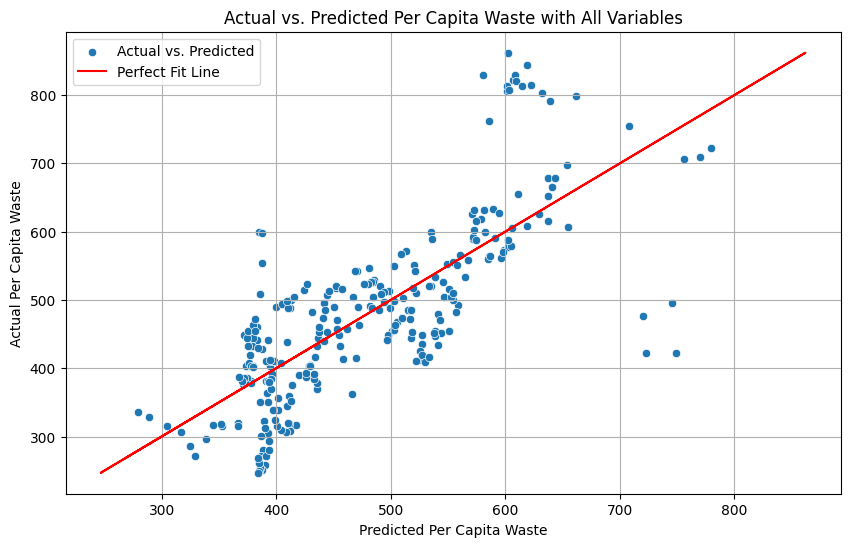

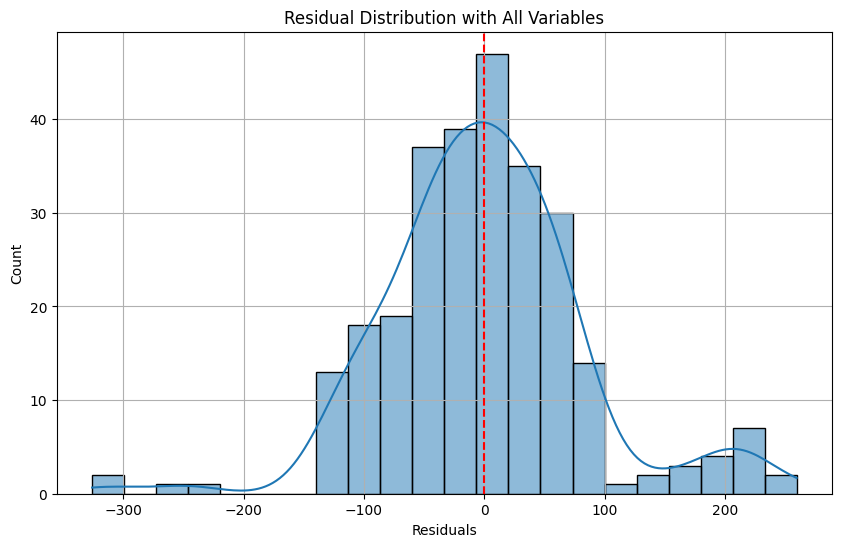

In [7]:
# Step 1: Import required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Load the data from the CSV file
file_path = '/content/Final_Combined_Higher_Education_Waste_Income_Tourist_Manufacture_Data (2).csv'
df = pd.read_csv(file_path)

# Step 3: Data cleaning - Drop rows with missing values in any of the relevant columns
# Ensure that all relevant columns are numeric
columns_to_check = ['Higher Education Population', 'Per Capita Income',
                    'Tourist Count', 'Low Value Manufacturing',
                    'High Value Manufacturing', 'Per Capita Waste']

# Convert all columns to numeric values, coercing errors to handle non-numeric entries
for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing or non-numeric values
df_clean = df.dropna(subset=columns_to_check)

# Step 4: Define the independent variables (X) and dependent variable (Y)
X = df_clean[['Higher Education Population', 'Per Capita Income',
              'Tourist Count', 'Low Value Manufacturing', 'High Value Manufacturing']]
Y = df_clean['Per Capita Waste']

# Step 5: Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Step 6: Fit the multiple linear regression model using statsmodels
model = sm.OLS(Y, X).fit()

# Step 7: Display the regression results summary
print(model.summary())

# Step 8: Visualize the relationship between the predicted values and the actual values of Per Capita Waste
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=Y, label='Actual vs. Predicted')
plt.plot(Y, Y, color='red', label='Perfect Fit Line')  # Reference line for perfect prediction
plt.xlabel('Predicted Per Capita Waste')
plt.ylabel('Actual Per Capita Waste')
plt.title('Actual vs. Predicted Per Capita Waste with All Variables')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Residual analysis - Plot residuals to check the distribution
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residual Distribution with All Variables')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()
